# 7.  Logistic Regression with PyTorch

## 1. About Logistic Regression

### 1.1 Logistic Regression Basics

#### Classification algorithm

- Example: Spam vs No Spam
    - Input: Bunch of words
    - Output: Probability spam or not

#### Basic Comparision

- **Linear regression**
    - Output: numeric value given inputs
- **Logistic regression**
    - Output: probability [0, 1] given input belonging to a class

#### Input/Output Comparision

- **Linear regression: Multiplication**
    - Input: [1]
        - Output: 2
    - Input: [2]
        - Output: 4
    - Trying to model the relationship y = 2x
- **Logistic regression: Spam**
    - Input: "Sign up to get 1 million dollars by tonight"
        - Output: p = 0.8
    - Input: "This is a receipt for your recent purchase with Amazon"
        - Output: p = 0.3
    - **p: probability it is spam**

### 1.2 Problems of Linear Regression

- Example
    - Fever
    - **Input**: temperature
    - **Output**: fever or no fever
- Remember
    - **Linear regression**: minimize error between points and line

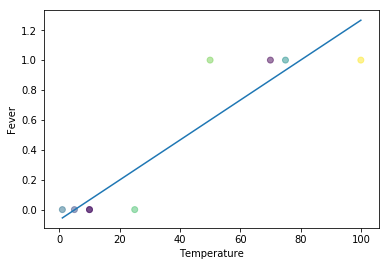

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

** Linear Regression Problem 1 **<br>
Fever value can go negative(below 0) and positive(above 1)

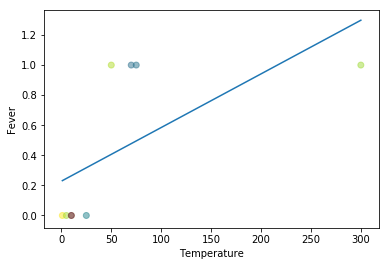

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Linear Regression Problem 2**<br>
Fever points not predicted with outliers.

### 1.3 Logistic Regression In-Depth

#### Predicting Probability

- Linear regression doesn't work
- Instead of predicting direct values: **predict probability**

<img src = './images/07-01.png'>

**Logistic Function** $g()$
- Two-class logistic regression
- $y= Ax + b$
- $g(y) = Ax + b$
- $g(y) = \frac{1}{1+e^{-y}} = \frac{1}{1+e^{-(Ax + b)}} $
- $g(y)$ = Estimated probability that $y = 1$ given $x$

**Softmax Function** $g()$
- Multi-class logistic regression
- Generalization of logistic function

** Cross Entropy Funciton ** $D()$<br>

S: Softmax, L: Label
- $D(S, L) = L\log S - (1 - L) \log (1-S)$
    - IF L = 0 (label)
        - $D(S, 0) = - \log(1-S)$
            - $-log(1-S)$: less positive if S $\rightarrow$ 0
            - $-log(1-S)$: more positive if S $\rightarrow$ 1 (BIGGER LOSS)
    - IF L = 1 (label)
        - $D(S, 1) = logS$
            - $logS$: less negative if S $\rightarrow$ 1
            - $logS$: more negative if S $\rightarrow$ 0 (BIGGER LOSS)

In [6]:
import math
print (-math.log(1 - 0.00001))
print (-math.log(1 - 0.99999))

print (math.log(0.99999))
print (math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


** Cross Entropy Loss $L$ **
- Goal: Minimizing Cross Entropy Loss
- $L = \frac{1}{N}\sum_{i}D(g(Ax_i + b), L_i)$

## 2. Building a Logistic Regression Model with PyTorch

<img src = './images/07-02.png'>

#### Steps

- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

#### Step 1a: Loading MNIST Train Dataset
**Images from 0 to 9**

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [3]:
train_dataset = dsets.MNIST(root='./data',
                            train=True, # This is training set
                            transform=transforms.ToTensor(), # We deal with tensor not numpy
                            download=True)

Processing...
Done!


In [4]:
len(train_dataset)

60000

In [5]:
train_dataset[0]

(tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.000

In [6]:
type(train_dataset[0])

tuple

In [7]:
len(train_dataset[0])

2

In [8]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [9]:
# Label
train_dataset[0][1]

tensor(5)

** Displaying MNIST **

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [12]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

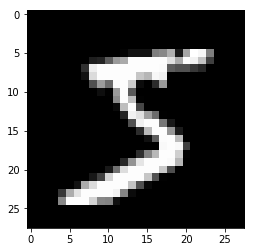

In [13]:
plt.imshow(show_img, cmap='gray')

In [14]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

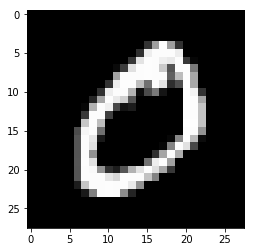

In [15]:
plt.imshow(show_img, cmap='gray')

In [16]:
# Label
train_dataset[1][1]

tensor(0)

#### Step 1b: Loading MNIST Test Dataset
- Show our algorithm works beyond the data we have trained on.
- Out-of-sample

In [17]:
test_dataset = dsets.MNIST(root='./data',
                          train=False,
                          transform=transforms.ToTensor())

In [18]:
len(test_dataset)

10000

In [19]:
type(test_dataset[0])

tuple

In [20]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

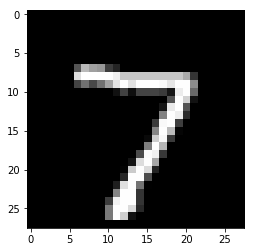

In [21]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [22]:
# Label
test_dataset[0][1]

tensor(7)

#### Step 2: Make Dataset Iterable

- Aim: make the dataset iterable
- **totaldata**: 60000
- **minibatch**: 100
    - Number of examples in 1 iteration
- **iterations** : 3000
    - 1 iteration: one mini-batch forward & backward pass
- **epochs**
    - 1 epoch : running through the whole dataset once

- $epochs$ = $iterations$ $\div$ $\frac{totaldata}{minibatch}$ = 3000 $\div$ $\frac{60000}{100}$ = 5
    - iterates whole dataset 5 times

In [23]:
len(train_dataset)

60000

In [24]:
batch_size = 100

In [25]:
n_iters = 3000

In [26]:
num_epochs =  n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

#### Create Iterable Object: Training Dataset

In [27]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

#### Check Iterability

In [28]:
import collections
isinstance(train_loader, collections.Iterable)

True

#### Create Iterable Object: Testing Dataset

In [29]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

#### Check Iterability

In [30]:
isinstance(test_loader, collections.Iterable)

True

#### Main Aim: Iterate Through Dataset

In [31]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

In [32]:
# Need to iterate
# Think of numbers as the images
for i in lst:
    print (i.shape)

(28, 28)
(28, 28)


#### Step 3: Building Model

In [33]:
# Same as linear regression!
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Step 4: Instantiate Model Class

- Input dimension:
    - Size of image
    - 28 $\times$ 28 = 784
- Output dimension: 10
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [34]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [35]:
input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#### Step 5: Instantiate Loss Class

- **Logistic Regression **: Cross Entropy Loss
    - Linear Regression: MSE

In [36]:
criterion = nn.CrossEntropyLoss()

** What happens in nn.CrossEntropyLoss() ?**
- Computes softmax (logistic / softmax function)
- Computes cross entropy

#### Step 6: Instantiate Optimizer Class

- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_{\theta}$
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_{\theta}$: parameters' gradients
        
    - Even simplier equation
        - parameters = parameters - learning_rate * parameters_gradients
        - **At every iteration, we update our model's parameters**

In [37]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Parameters In-Depth

In [38]:
print (model.parameters())

print (len(list(model.parameters())))

# FC 1 Parameters
print (list(model.parameters())[0].size())

# FC 1 Bias Parameters
print (list(model.parameters())[1].size())

<generator object Module.parameters at 0x1162815c8>
2
torch.Size([10, 784])
torch.Size([10])


#### Quick Dot Product Review


- Example 1: **dot product**
    - A: (100, 10)
    - B: (10, 1)
    - A$\cdot$B = (100, 10) $\cdot$ (10, 1) = (100, 1)

- Example 2: **dot product**
    - A: (50, 5)
    - B: (5, 2)
    - A$\cdot$B = (50, 5)$\cdot$(5, 2) = (50, 2)
    
- Example 3: **element-wise addition**
    - A: (10, 1)
    - B: (10, 1)
    - A + B = (10, 1)

<img src = "./images/07-03.png">

#### Step 7: Train Model
- Process
    1. Convert inputs/labels to variables
    2. Clear gradient buffers
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - parameters = parameters - learning_rate * parameters_gradients
    7. REPEAT

In [39]:
iter = 0 
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Load images as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            
            # Calculate Accuracy
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
                
                # Load images to a Torch Variable
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass onlly to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0) #labels.size()[0] works too
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print Loss
            print (f'Iteration: {iter}, Loss: {loss.item()}, Accuracy: {accuracy}')

Iteration: 500, Loss: 1.791493535041809, Accuracy: 70
Iteration: 1000, Loss: 1.567305326461792, Accuracy: 76
Iteration: 1500, Loss: 1.358109951019287, Accuracy: 79
Iteration: 2000, Loss: 1.2247133255004883, Accuracy: 81
Iteration: 2500, Loss: 1.0395981073379517, Accuracy: 82
Iteration: 3000, Loss: 0.9118775725364685, Accuracy: 82


**torch.max()**

In [40]:
a = torch.randn(6, 4)

In [41]:
a

tensor([[ 1.3676,  0.4412, -0.6046,  0.6784],
        [-0.8478,  1.2934,  1.6213, -0.0579],
        [ 2.2575, -0.1541, -0.0845, -0.7925],
        [ 1.0053,  1.1635, -0.0287,  0.6005],
        [ 1.4176,  0.8456, -0.8669, -1.0966],
        [ 1.0112, -0.1294,  0.5347,  0.6778]])

In [42]:
torch.max(a, 1)

(tensor([ 1.3676,  1.6213,  2.2575,  1.1635,  1.4176,  1.0112]),
 tensor([ 0,  2,  0,  1,  0,  0]))

In [43]:
torch.max(a, 0)

(tensor([ 2.2575,  1.2934,  1.6213,  0.6784]), tensor([ 2,  1,  1,  0]))

In [44]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test == 1:
        print ('OUTPUTS')
        print (outputs.size())
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


In [45]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test == 1:
        print ('OUTPUTS')
        print (outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.3023, -1.2186, -0.4442, -0.2584, -0.1548, -0.4458, -1.0819,
         2.8348, -0.2817,  0.9246])


In [46]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted.size())

PREDICTION
torch.Size([100])


In [47]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted[0])

PREDICTION
tensor(7)


In [48]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted[0])
        print ('-'*9)
        print ('LABEL SIZE')
        print (labels.size())
        print ('-'*9)
        print ('LABEL FOR IMAGE 0')
        print (labels[0])

PREDICTION
tensor(7)
---------
LABEL SIZE
torch.Size([100])
---------
LABEL FOR IMAGE 0
tensor(7)


In [49]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    if iter_test == 1:
        print ('PREDICTION')
        print (predicted[1])
        print ('-'*9)
        print ('LABEL SIZE')
        print (labels.size())
        print ('-'*9)
        print ('LABEL FOR IMAGE 1')
        print (labels[1])

PREDICTION
tensor(2)
---------
LABEL SIZE
torch.Size([100])
---------
LABEL FOR IMAGE 1
tensor(2)


In [50]:
correct = 0
total = 0
iter_test = 0

for images, labels in test_loader:

    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * int(correct) / int(total)

print (accuracy)

82.96


In [51]:
(predicted == labels).sum()

tensor(79)

In [52]:
# Explaining .sum() python built-in function
# correct += (predicted == labels).sum()
import numpy as np
a = np.ones((10))
print (a)

b = np.ones((10))
print (b)

print (a == b)

print ((a == b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


** Saving Model **

In [53]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

## 3. Building a Logistic Regression Model with PyTorch (GPU)

** CPU Version **

In [64]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root = './data',
                            train = True,
                            transform = transforms.ToTensor(),
                            download = True)

test_dataset = dsets.MNIST(root = './data',
                           train = False,
                           transform = transforms.ToTensor())


'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset= test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

'''
STEP 3: CREATE MODEL CLASS
'''

class LogisticRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 4: INSTANTIATE MODEL CLASS
'''

input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)


'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMZER CLASS
'''
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear graidents w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass only to get output/logits
        # 100 x 10
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maxiumum value
                # 100 x 1
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * int(correct) / int(total)
            
            # Print Loss
            print (f'Iteration: {iter}, Loss: {loss.item()}, Accuracy: {accuracy}')

Iteration: 500, Loss: 1.8782968521118164, Accuracy: 67.45
Iteration: 1000, Loss: 1.524390459060669, Accuracy: 77.73
Iteration: 1500, Loss: 1.3914158344268799, Accuracy: 80.14
Iteration: 2000, Loss: 1.148782730102539, Accuracy: 81.47
Iteration: 2500, Loss: 1.1579616069793701, Accuracy: 82.35
Iteration: 3000, Loss: 0.9467718601226807, Accuracy: 83.09


GPU: 2 things must be on GPU

- model
- variables

In [65]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 28*28).cuda())
                else:
                    images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
                    
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print (f'Iteration: {iter}, Loss: {loss.item()}, Accuracy: {accuracy}')

Iteration: 500, Loss: 1.8790545463562012, Accuracy: 69
Iteration: 1000, Loss: 1.5877498388290405, Accuracy: 77
Iteration: 1500, Loss: 1.3639423847198486, Accuracy: 80
Iteration: 2000, Loss: 1.25637948513031, Accuracy: 81
Iteration: 2500, Loss: 1.1072089672088623, Accuracy: 82
Iteration: 3000, Loss: 1.0554050207138062, Accuracy: 83


# Summary

- **Logistic regression ** basics
- **Problems ** of **linear regression**
- **In-depth** Logistic Regression
    1. Get logits
    2. Get Softmax
    3. Get cross-entropy loss
- **Aim**: reduce cross-entropy loss
- built a **logistic regression model ** in CPU and GPU
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - Step 3: Create Model Class
    - Step 4: Instantiate Model Class
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - Step 7: Train Model
- Important things to be on **GPU**
    - model
    - variables